# FINAL PROJECT: CAN MY LOCAL GAS STATION GET RID OF SOME PUMPS?

Marley Myrianthopoulos

CUNY SPS

DATA 604

SUMMER 2024

## TASK:

Using SimPy, write a process simulation that includes waiting time (discrete event simulation).  You may use any topic of interest to you.  Write the simulation and all of the following in Jupyter.

Each element is worth 5 points and will be graded using the rubric shown here.

1.  State the problem and its significance.

2.  Provide a flow-chart model.

3.  Simulate the process for the appropriate number of iterations (justify)

4.  Justify the validity of the model and discuss how you verified it.

5.  State  your conclusions/ findings from the model.

6.  Generate appropriate graphs (more than one) to illustrate the results and provide a PowerPoint presentation to share with your colleagues.  Post this to the discussion.

## PART 1: STATE THE PROBLEM AND ITS SIGNIFICANCE

For this project, I'll be looking at whether a gas station near my apartment can eliminate four of its twelve gas pumps without having any customers unable to find an available pump. This gas station is located right off a major road, and the awkward maneuvers of cars attempting to enter and exit the station often cause unpleasant traffic issues. The station has 3 sets of gas pumps, with 4 pumps in each set. I believe that the removal of one of the sets would create space for cars to quickly exit the nearby road and maneuver in the parking area, eliminating the traffic issues associated with the gas station. However, I understand that the owners of the station would be hesitant to do so if it meant that they no longer had enough pumps to serve their customer base (as drivers will often simply move on to another nearby gas station if no pumps are available). A Google stree view photo of the offending station is shown below:

![Gas Station](https://github.com/Marley-Myrianthopoulos/cunysps_data604/blob/main/final_project/gas_station_image.png?raw=true)

I selected this question for my final project because this is the sort of scenario where I think simulation might help convince people that a course of action is safe or desirable in ways that other mathematical analyses might not. I hope you enjoy!

## PART 2: PROVIDE A FLOW CHART MODEL

The flow chart model will incorporate the following steps:

1. Simulate the number of customers leaving the gas station during the iteration (a time interval of one minute). Each customer will have a probability p_1 of departing. If the number of pumps in use is 0, ignore the result. If the number of pumps in use is greater than 0 and the simulation results in a customer leaving, reduce the number of pumps in use by 1 (increasing the number of available pumps by 1).

2. Simulate the possibility of a customer arriving at the gas station during the iteration (a time interval of one minute). This will have probability p_2 of occurring. If the number of available pumps is 0 and the simulation results in a customer arriving, increase the number of "missed" customers by 1. If the number of available pumps is non-zero and the simulation results in a customer arriving, decrease the number of available pumps by 1 (increasing the number of pumps in use by 1).

It is necessary to begin by simulating the departure of a customer because otherwise a customer might arrive and then immediately depart, which does happen but is not within the scope of this simulation.

![Flow Chart](https://github.com/Marley-Myrianthopoulos/cunysps_data604/blob/main/final_project/myrianthopoulos_final_flow_chart.png?raw=true)

## PART 3: SIMULATE THE PROCESS FOR THE APPROPRIATE NUMBER OF ITERATIONS (JUSTIFY)

For this simulation, I use the modsim library.

In [314]:
# Install and import modsim (code provided by modsim notebooks)


# install Pint if necessary

try:
    import pint
except ImportError:
    !pip install pint

# download modsim.py if necessary

from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/modsim.py')

# import functions from modsim

from modsim import *

The gas station will be represented as a `State` object, with the parameters `pumps_in_use` representing the number of pumps currently being used by customers, `pumps_available` representing the number of pumps currently not in use (starting with 8, which is the number of pumps that the station would have if it removed one set), and `missed_customers` representing the number of customers who do not stop for gas because there are no available pumps (it is possible that some customers would stop and wait depending on their circumstances, but the objection to removing a set of pumps would be rooted in fear that customers would move on instead of stopping if no pumps were available so that behavior is assumed for this simulation).

In [315]:
# Represent the gas station with a State object
gas_station = State(pumps_in_use = 0, pumps_available = 8, missed_customers = 0)

# Set a random seed for the simulation
import pandas as pd
import numpy as np
np.random.seed(1989)

# Create functions representing customers departing and arriving
def customer_departs():
  if gas_station.pumps_in_use > 0:
    gas_station.pumps_in_use -= 1
    gas_station.pumps_available += 1

def customer_arrives():
  if gas_station.pumps_available > 0:
    gas_station.pumps_in_use += 1
    gas_station.pumps_available -= 1
  else:
    gas_station.missed_customers += 1

# Define the step function that executes the flow chart
def step(p_arrive, p_depart):
  for i in range(gas_station.pumps_in_use):
    if flip(p_depart):
      customer_departs()
  if flip(p_arrive):
    customer_arrives()

# Define the function that executes the simulation and displays a
# plot of the number of pumps available over the time interval specified
# and the number of minutes when each number of pumps was available
def run_simulation(p_arrive, p_depart, num_steps):
    results = TimeSeries()
    for i in range(num_steps):
        step(p_arrive, p_depart)
        results[i+1] = gas_station.pumps_available

    results.plot()
    decorate(title = 'Gas Pumps Available',
             xlabel = 'Time step (min)',
             ylabel = 'Available Pumps')
    plt.show()

    results_df = pd.DataFrame({'available_pumps': results.values})
    results_df.groupby('available_pumps').size().plot(kind='bar')
    decorate(title = 'Gas Pumps Available',
             xlabel = 'Available Pumps',
             ylabel = 'Number of Minutes')
    plt.show()


We are now ready to run the simulation. For `p_1` (the probability of each customer leaving during a 1-minute interval) I will be using 0.2, corresponding to an average visit of 5 minutes per customer. For `p_2` (the probability that a customer arrives during each one minute interval), I will be using 0.9, corresponding to an average of 9 customers every 10 minutes, or 54 customers every hour. For the number of iterations, I will be using 300 (to account for a five-hour "rush hour" window when the station is theoretically at its busiest).

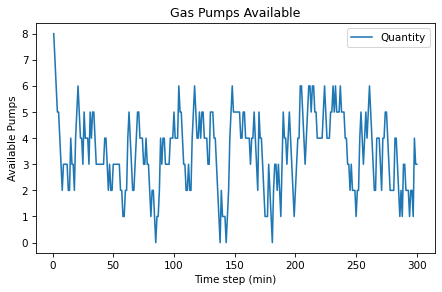

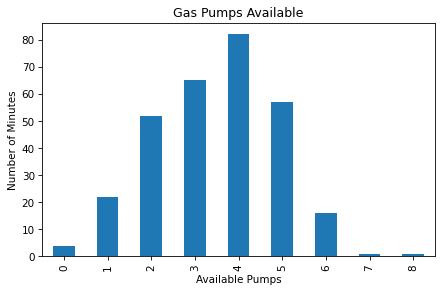

Total Customers Turned Away: 0


In [316]:
run_simulation(0.9, 0.2, 300)
print('Total Customers Turned Away:',gas_station.missed_customers)

The `missed_customers` parameter of the gas_station object shows that no customers were turned away from the station due to there not being any available pumps during the interval.

## PART 4: JUSTIFY THE VALIDITY OF THE MODEL AND DISCUSS HOW YOU VERIFIED IT

The most important parameters of this model to validate are the rate of customer arrival and the average time between arrival and departure for customers at the station. These values were validated by observing the gas station in question and recording the arrival and departure times of vehicles using the station for a period of 30 minutes, resulting in an average customer stay of approximately 5 minutes and an average arrival rate of approximately 54 customers per hour. Other assumptions made in the construction of this model were the duration of the simulation (5 hours, which was selected as an appropriate "rush-hour" window because NYC-area HOV lanes are open for 5 hours on weekday afternoons) and that customers would leave the station if there were no available pumps rather than waiting (which is the argument against removing the pumps, and therefore should be taken as a given). Each of these assumptions is appropriate for the situation being modeled.

I verified the model by building it one piece at a time and testing it with that piece. For each piece, I gave the model specific inputs that I had determined the appropriate output for by hand, and then confirmed that the model produced those outputs.




## PART 5: STATE YOUR CONCLUSIONS/FINDINGS FROM THE MODEL

The simulation demonstrates that there are no customers turned away by the station during the busiest time of day. For the most part, the station operates at about half capacity, with 3, 4, and 5 pumps available out of 8 being the most common states at any given moment in time. It is hard to justify the continued traffic issues caused by cars navigating the entrance and exit of the station under the circumstances. The station should remove one set of pumps to ameliorate this problem, unless they foresee an imminent sharp increase in customer frequency.

## PART 6: GENERATE APPROPRIATE GRAPHS (MORE THAN ONE) TO ILLUSTRATE THE RESULTS AND PROVIDE A POWERPOINT PRESENTATION TO SHARE WITH YOUR COLLEAGUES

The graphs are shown above. The powerpoint presentation is [here](https://docs.google.com/presentation/d/1OqgVxxfvJDIpTWr2sAixUuM9RwoQlxLwUqfu3rJGX_U/edit?usp=sharing).